In [1]:
#Submission dicoding machine learning pemula
#Dicky Arya Pratama
#dickyarya17@outlook.co.id

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O /tmp/rockpaperscissors.zip

--2020-10-23 07:01:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.27MB/s    in 53s     

2020-10-23 07:02:40 (5.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
!pip install split_folders

In [6]:
import splitfolders

splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', '/tmp/rockpaperscissors/data', seed=1, ratio=(.6, .4))

Copying files: 2188 files [00:00, 2970.12 files/s]


In [7]:
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('/tmp/rockpaperscissors/data/train')
os.listdir('/tmp/rockpaperscissors/data/val')

['rock', 'scissors', 'paper']

In [8]:
#Train Set
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
#Validation Set
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  zoom_range=0.2, 
  horizontal_flip=True) 

test_datagen = ImageDataGenerator(
  rescale=1./255,
  shear_range=0.2, 
  zoom_range=0.2,
  horizontal_flip=True)

In [11]:
train_generator = train_datagen.flow_from_directory(
  train_dir, #direktori data latihnya
  target_size=(150, 150), #Mengubah Resolusi 
  batch_size=32, 
  color_mode='rgb', #Menggunakan Rgb
  class_mode='categorical', 
  shuffle = True, 
  seed=42)
validation_generator = test_datagen.flow_from_directory(
  validation_dir, #direktori data validasii
  target_size=(150, 150),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [12]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

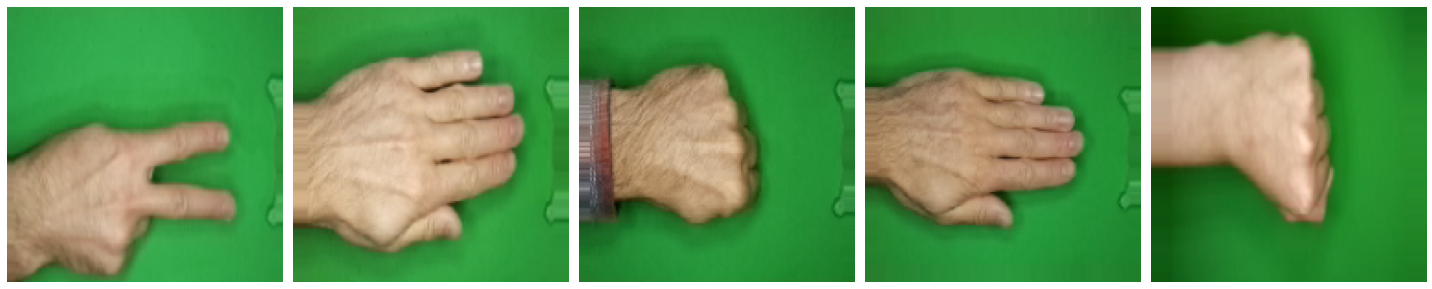

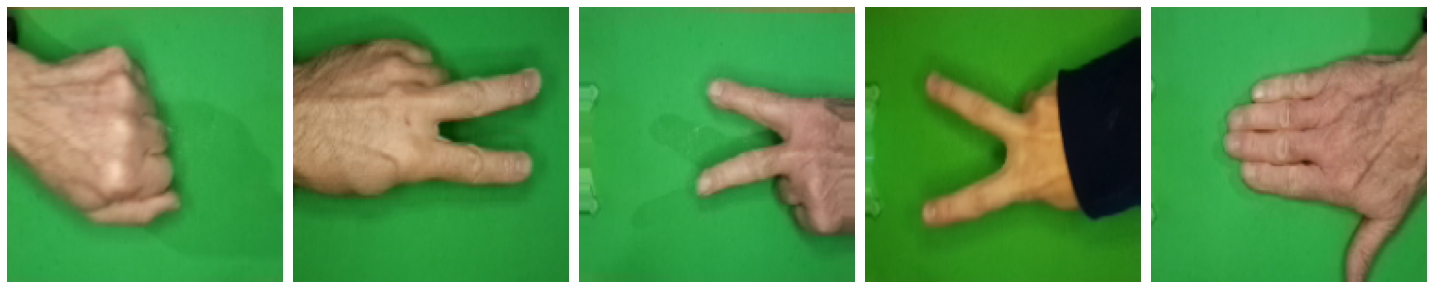

In [14]:
import matplotlib.pyplot as plt
plotImages(sample_train_images[:6])
plotImages(sample_val_images[:6])

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [18]:
train = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=20, 
          validation_data=validation_generator,
          validation_steps=5,
          verbose=1)

Epoch 1/20
25/25 [==============================] - 41s 2s/step - loss: 1.1068 - accuracy: 0.4425 - val_loss: 0.9378 - val_accuracy: 0.5688
Epoch 2/20
25/25 [==============================] - 40s 2s/step - loss: 0.5740 - accuracy: 0.7850 - val_loss: 0.4729 - val_accuracy: 0.8250
Epoch 3/20
25/25 [==============================] - 44s 2s/step - loss: 0.3441 - accuracy: 0.8737 - val_loss: 0.2397 - val_accuracy: 0.9312
Epoch 4/20
25/25 [==============================] - 40s 2s/step - loss: 0.2683 - accuracy: 0.9025 - val_loss: 0.3808 - val_accuracy: 0.8562
Epoch 5/20
25/25 [==============================] - 40s 2s/step - loss: 0.2193 - accuracy: 0.9262 - val_loss: 0.2438 - val_accuracy: 0.9500
Epoch 6/20
25/25 [==============================] - 40s 2s/step - loss: 0.2060 - accuracy: 0.9300 - val_loss: 0.2454 - val_accuracy: 0.9250
Epoch 7/20
25/25 [==============================] - 40s 2s/step - loss: 0.1572 - accuracy: 0.9475 - val_loss: 0.1540 - val_accuracy: 0.9500
Epoch 8/20
25/25 [==

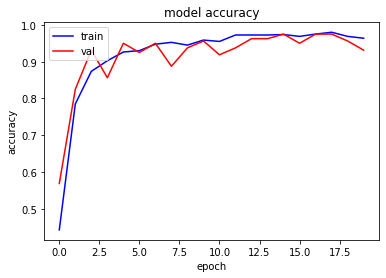

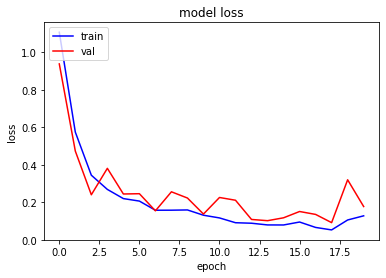

In [19]:
import matplotlib.pyplot as plt

acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Saving WhatsApp Image 2020-10-23 at 10.07.19 AM.jpeg to WhatsApp Image 2020-10-23 at 10.07.19 AM.jpeg
SCISSORS


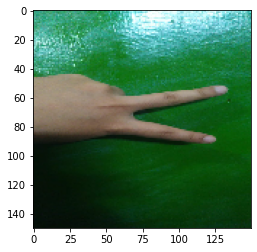

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
uploaded = files.upload()
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  if classes[0,0]!=0:
    print('PAPER')
  elif classes[0,1]!=0:
    print('ROCK')
  else:
    print('SCISSORS')